In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from scipy.signal import convolve2d
from scipy.signal import convolve

In [2]:
"""
This notebook holds the tests of the budding functionality for the generalized spatial cosmo model based off of
the work of Babak Momeni. We will start by building a search function for an isolated cell that is not near the 
edge of the simulation grid. Then add functionality near the edges. In all cases we will try to get statistics 
of budding directionality so we can have solid controls.
"""

'\nThis notebook holds the tests of the budding functionality for the generalized spatial cosmo model based off of\nthe work of Babak Momeni. We will start by building a search function for an isolated cell that is not near the \nedge of the simulation grid. Then add functionality near the edges. In all cases we will try to get statistics \nof budding directionality so we can have solid controls.\n'

In [3]:
x,y,z = 1,2,0

X = np.zeros((5,5,5))
X[x,y,z] = 1

budded = True

X_original = X.copy()

In [4]:
#Let's start with the basics. We will try to get the statistics right for a single isolated cell.

if budded:
    
    """
    The general strategy will be to generate a list of adjacent points with respect to periodic boundary 
    conditions. Then, make a smaller list of these points that are empty. If there are no empty points in the 
    plane, we will search the plane above. Once a list of potential points has been generated, the cell will 
    randomly bud into one. 
    """
        
    #the coordinates of the cell to be propagated
    coords = np.array([x,y,z])
    
    success = True
    
    possibilities = np.where(X[int(coords[0]-1):int(coords[0]+2),int(coords[1]-1):int(coords[1]+2),int(coords[2])]==0)
    
    possibilities = np.asarray(possibilities)
    possibilities[0,:] += coords[0] -1
    possibilities[1,:] += coords[1] -1
    n_possibilities = np.size(possibilities[0])
    print(possibilities)
    floor = 0
    
    if n_possibilities == 0:
        print('trying one floor up')
        
        new_possibilities = np.where(X[int(coords[0]-1):int(coords[0]+2),int(coords[1]-1):int(coords[1]+2),int(coords[2]+1)]==0)
        new_possibilities[0] += coords[0] -1
        new_possibilities[1] += coords[1] -1
        n_new_possibilities = np.size(new_possibilities)
        
        if n_new_possibilities == 0:
            print('no available space, cannot bud')
            success = False
        else:
            possibilities = new_possibilities
            n_possibilities = n_new_possibilities
            floor = 1
            
    if success:
        index_to_bud = int(np.floor(np.random.rand()*n_possibilities))
        x_temp = int(possibilities[0][index_to_bud])

        X[int(possibilities[0][index_to_bud]),int(possibilities[1][index_to_bud]),int(coords[2]+floor)] = 1

[[0 0 0 1 1 2 2 2]
 [1 2 3 1 3 1 2 3]]


In [5]:
def periodic_image(coord,dimension):
    return int(coord%dimension)

In [6]:
def simple_plot(X,title,plane):
    plt.imshow(X[:,:,plane],cmap = 'hot_r')
    plt.gca().set_yticklabels([])
    plt.gca().set_xticklabels([])
    plt.gca().set_yticks([])
    plt.gca().set_xticks([])
    plt.title(title)
    plt.show()

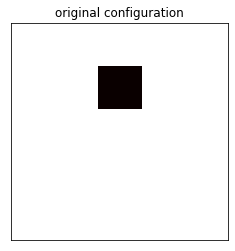

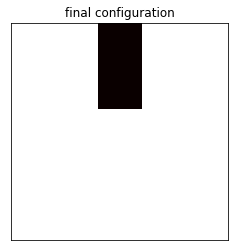

In [7]:
title = 'original configuration'
simple_plot(X_original,title,z)

title = 'final configuration'
simple_plot(X,title,z)

In [8]:
#time for a little streamlining and some statistics
def bud(x,y,z,X_og,typ):
    
    X = X_og.copy()
    
    #the coordinates of the cell to be propagated
    coords = np.array([x,y,z])
    
    shp = np.shape(X)
    
    
    #make a 3x3 stencil to search with
    xes = np.zeros(9)
    yes = np.zeros(9)

    xes[:3] = periodic_image(coords[0] - 1,shp[0])
    xes[3:6] = periodic_image(coords[0],shp[0])
    xes[6:] = periodic_image(coords[0] + 1,shp[0])

    yes[0::3] = periodic_image(coords[1] - 1,shp[1])
    yes[1::3] = periodic_image(coords[1],shp[1])
    yes[2::3] = periodic_image(coords[1] + 1,shp[1])
    
    
    poss_xvals = xes[X[xes.astype('int'),yes.astype('int'),int(coords[2])]==0]
    poss_yvals = yes[X[xes.astype('int'),yes.astype('int'),int(coords[2])]==0]
    
    n_possibilities = np.size(poss_xvals)
    floor = 0
    
    success = True

    
    if n_possibilities == 0:
        #print('trying one floor up')
        
        new_poss_xvals = xes[X[xes.astype('int'),yes.astype('int'),int(coords[2] + 1)]==0]
        new_poss_yvals = yes[X[xes.astype('int'),yes.astype('int'),int(coords[2] + 1)]==0]

        n_new_possibilities = np.size(new_poss_xvals)
        
        if n_new_possibilities == 0:
            print('no available space, cannot bud')
            success = False
        else:
            poss_xvals = new_poss_xvals
            poss_yvals = new_poss_yvals
            n_possibilities = n_new_possibilities
            floor = 1
            
    if success:
        index_to_bud = int(np.floor(np.random.rand()*n_possibilities))

        X[int(poss_xvals[index_to_bud]),int(poss_yvals[index_to_bud]),int(coords[2]+floor)] = typ
        #nutrients['%s'%ident]['S_internal'][x,y,z] = 0
        
    return X

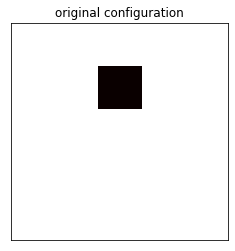

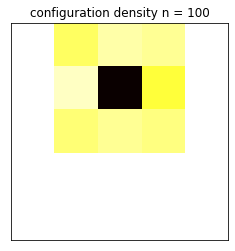

In [9]:
#regular
npts = 100

x,y,z = 1,2,0

X = np.zeros((5,5,5))
X[x,y,z] = 1
typ = 1

budded = True

X_original = X.copy()

for ii in range(npts):
    
    #print(ii)
    X += bud(x,y,z,X_original,typ)

title = 'original configuration'
simple_plot(X_original,title,z)

title = 'configuration density n = %s'%npts
simple_plot(X/npts,title,z)

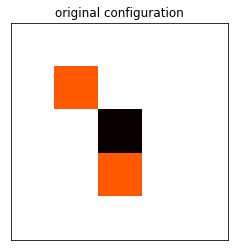

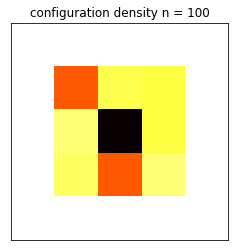

In [14]:
#obstacle course!
npts = 100

x,y,z = 2,2,0
typ = 2

X = np.zeros((5,5,5))
X[x,y,z] = typ
X[1,1,0] = 1
X[3,2,0] = 1

budded = True

X_original = X.copy()

for ii in range(npts):
    
    #print(ii)
    X += bud(x,y,z,X_original,typ)

title = 'original configuration'
simple_plot(X_original,title,z)

title = 'configuration density n = %s'%npts
simple_plot(X/npts,title,z)

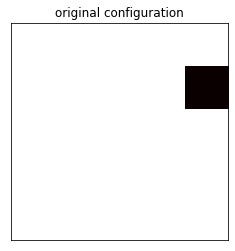

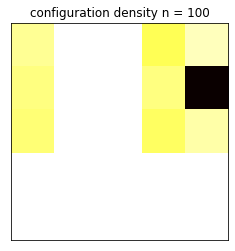

In [11]:
#edge case
npts = 100

x,y,z = 1,4,0
typ = 1

X = np.zeros((5,5,5))
X[x,y,z] = typ

budded = True

X_original = X.copy()

for ii in range(npts):
    
    #print(ii)
    X += bud(x,y,z,X_original,typ)

title = 'original configuration'
simple_plot(X_original,title,z)

title = 'configuration density n = %s'%npts
simple_plot(X/npts,title,z)

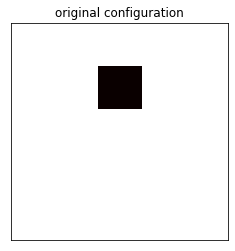

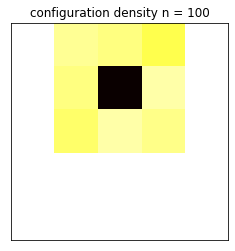

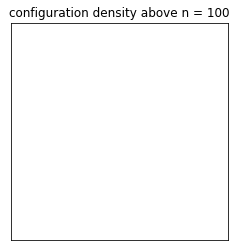

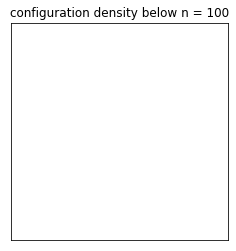

In [12]:
#double checking that Z works
npts = 100

x,y,z = 1,2,1
typ = 1

X = np.zeros((5,5,5))
X[x,y,z] = typ

budded = True

X_original = X.copy()

for ii in range(npts):
    
    #print(ii)
    X += bud(x,y,z,X_original,typ)

title = 'original configuration'
simple_plot(X_original,title,z)

title = 'configuration density n = %s'%npts
simple_plot(X/npts,title,z)

title = 'configuration density above n = %s'%npts
simple_plot(X/npts,title,z+1)

title = 'configuration density below n = %s'%npts
simple_plot(X/npts,title,z-1)

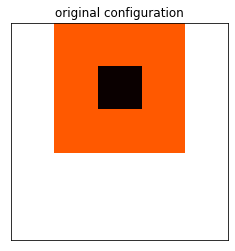

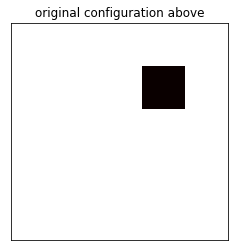

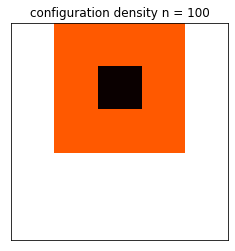

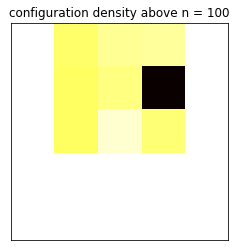

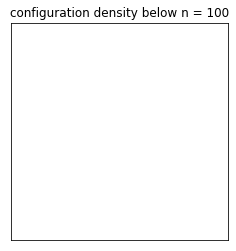

In [20]:
#double checking that Z works
npts = 100

x,y,z = 1,2,1
typ = 2

X = np.zeros((5,5,5))
shp = np.shape(X)

xes = np.zeros(9)
yes = np.zeros(9)

xes[:3] = periodic_image(coords[0] - 1,shp[0])
xes[3:6] = periodic_image(coords[0],shp[0])
xes[6:] = periodic_image(coords[0] + 1,shp[0])

yes[0::3] = periodic_image(coords[1] - 1,shp[1])
yes[1::3] = periodic_image(coords[1],shp[1])
yes[2::3] = periodic_image(coords[1] + 1,shp[1])

X[xes.astype('int'),yes.astype('int'),z]=1
X[x,y,z] = typ
X[x,y+1,z+1] = typ

budded = True

X_original = X.copy()

for ii in range(npts):
    
    #print(ii)
    X += bud(x,y,z,X_original,typ)

title = 'original configuration'
simple_plot(X_original,title,z)

title = 'original configuration above'
simple_plot(X_original,title,z+1)

title = 'configuration density n = %s'%npts
simple_plot(X/npts,title,z)

title = 'configuration density above n = %s'%npts
simple_plot(X/npts,title,z+1)

title = 'configuration density below n = %s'%npts
simple_plot(X/npts,title,z-1)

In [240]:
"""
That all went well (now that I've fixed the bugs:D). Let's move on to deal with periodic boundaries.
"""

"\nThat all went well (now that I've fixed the bugs:D). Let's move on to deal with periodic boundaries.\n"

In [241]:
x,y,z = 1,4,0

X = np.zeros((5,5,5))
X[x,y,z] = 1

budded = True

X_original = X.copy()

In [224]:
#Let's start with the basics. We will try to get the statistics right for a single isolated cell.

if budded:
    
    """
    The general strategy will be to generate a list of adjacent points with respect to periodic boundary 
    conditions. Then, make a smaller list of these points that are empty. If there are no empty points in the 
    plane, we will search the plane above. Once a list of potential points has been generated, the cell will 
    randomly bud into one. 
    """
        
    #the coordinates of the cell to be propagated
    coords = np.array([x,y,z])
    
    shp = np.shape(X)
    
    
    #make a 3x3 stencil to search with
    xes = np.zeros(9)
    yes = np.zeros(9)

    xes[:3] = periodic_image(coords[0] - 1,shp[0])
    xes[3:6] = periodic_image(coords[0],shp[0])
    xes[6:] = periodic_image(coords[0] + 1,shp[0])

    yes[0::3] = periodic_image(coords[1] - 1,shp[1])
    yes[1::3] = periodic_image(coords[1],shp[1])
    yes[2::3] = periodic_image(coords[1] + 1,shp[1])
    
    
    poss_xvals = xes[X[xes.astype('int'),yes.astype('int'),int(coords[2])]==0]
    poss_yvals = yes[X[xes.astype('int'),yes.astype('int'),int(coords[2])]==0]
    
    n_possibilities = np.size(poss_xvals)
    floor = 0
    
    success = True

    
    if n_possibilities == 0:
        print('trying one floor up')
        
        new_poss_xvals = xes[X[xes.astype('int'),yes.astype('int'),int(coords[2] + 1)]==0]
        new_poss_yvals = yes[X[xes.astype('int'),yes.astype('int'),int(coords[2] + 1)]==0]

        n_new_possibilities = np.size(poss_xvals)
        
        if n_new_possibilities == 0:
            print('no available space, cannot bud')
            success = False
        else:
            poss_xvals = new_poss_xvals
            poss_yvals = new_poss_yvals
            n_possibilities = n_new_possibilities
            floor = 1
            
    if success:
        index_to_bud = int(np.floor(np.random.rand()*n_possibilities))

        X[int(poss_xvals[index_to_bud]),int(poss_yvals[index_to_bud]),int(coords[2]+floor)] = 1

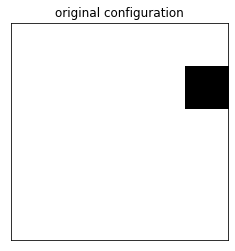

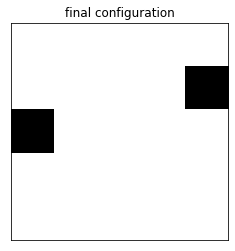

In [225]:
title = 'original configuration'
simple_plot(X_original,title)

title = 'final configuration'
simple_plot(X,title)